In [66]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from src.wandb_util import download_file
import wandb
import re
import os

In [27]:
cd ..

/Users/janek/Desktop/ProbabilisticDeepDiffusionModels


In [54]:
run_id = "zat0ojot"

def get_files_dict(run_id, project="ddpm/diffusion"):
    api = wandb.Api()
    run = api.run(f"{project}/{run_id}")
    files = run.files()
    return {f.name: f for f in files}

def list_available_epochs(filenames, pattern=r"images/images_grid_(\d+)"):
    matches = [re.search(pattern, pth) for pth in filenames]
    return list(sorted(set(int(m.group(1)) for m in matches if m)))

def filter_files(filenames, dir):
    return sorted(f for f in filenames if f.startswith(dir))

def _download(file, path, force_redownload=False):
    full_path = os.path.join(path, file.name)
    if os.path.exists(full_path) and not force_redownload:
        return full_path
    else:
        file.download(path, replace=True)
        return full_path
    
def get_image(run_id, dir_pattern=r"images/images_grid_", epoch=None, nth=0):
    files_dict = get_files_dict(run_id)
    if epoch is None:
        epoch = list_available_epochs(files_dict, pattern=dir_pattern+r"(\d+)")[-1]
    image_files = filter_files(files_dict, f"{dir_pattern}{epoch}/")
    file = image_files[nth]
    image_path = _download(files_dict[file], f"./data/{run_id}/")
    return Image.open(image_path), file, epoch

images/images_grid_99/image_0_epoch_99.png


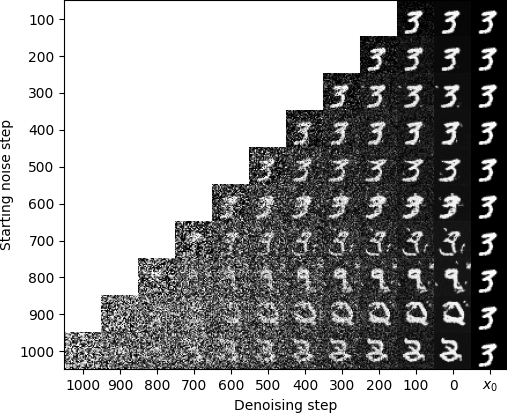

In [56]:
img, f, e = get_image("zat0ojot")
print(f)
img

images/images_grid_99/image_1_epoch_99.png


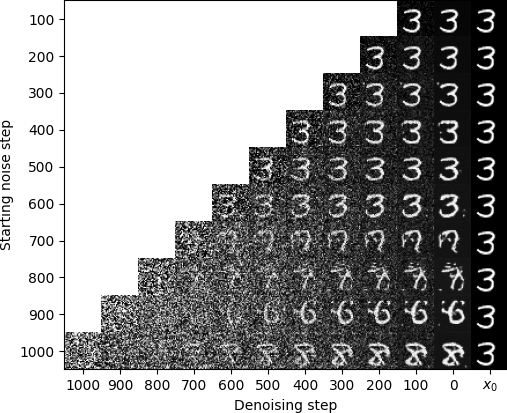

In [57]:
img, f, e = get_image("zat0ojot", nth=1)
print(f)
img

images/images_random_grid_99/epoch_99.png


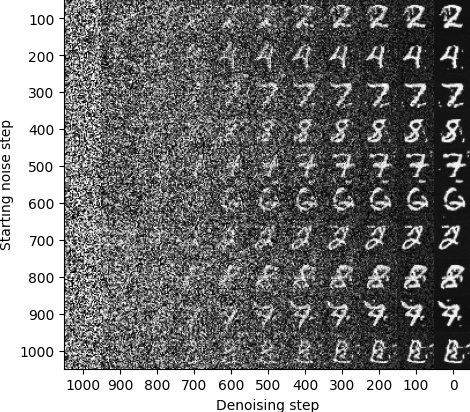

In [58]:
img, f, e = get_image("zat0ojot", r"images/images_random_grid_")
print(f)
img

In [71]:
import torch
torch.randn(2, generator=None)

tensor([ 0.1300, -1.3021])